Creator: Yu Qiu  
Date: 05/03/2022

In [1]:
#Import libraries and dataset

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
mkt = pd.read_excel(r'/Users/qiuyu/Desktop/ALY 6020/6020 dataset/6020 Project/marketing_campaign.xlsx')
print(mkt)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...            

In [3]:
mkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

In [5]:
#Percetage of missing values 
mkt.isnull().sum().sort_values(ascending = False)/len(mkt)

Income                 0.010714
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

In [6]:
mkt['Z_Revenue'].unique()

array([11])

In [7]:
mkt['Z_CostContact'].unique()

array([3])

In [8]:
# Drop Variables
mkt.drop('ID', inplace = True, axis =1)
mkt.drop('Z_Revenue', inplace = True, axis =1)
mkt.drop('Z_CostContact', inplace = True, axis =1)

In [9]:
mkt.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [10]:
#Impute missing values with Median
mkt['Income'] = mkt['Income'].fillna((mkt['Income'].median()))

In [11]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [12]:
# Transfrom Date variable into days
import datetime
date_object = datetime.date.today()
mkt['Dt_Customer'] = pd.to_datetime(mkt['Dt_Customer'])
mkt['Dt_Customer']
date_object = pd.to_datetime(date_object)
mkt['Dt_Customer']=(date_object-mkt['Dt_Customer']).dt.days
mkt = mkt.rename(columns = {"Dt_Customer":"Days"})

In [13]:
mkt.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Days,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,3556,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,3006,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,3205,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,3032,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,3054,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [14]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Days                 2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# Exploratory Data Analysis

In [15]:
mkt['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

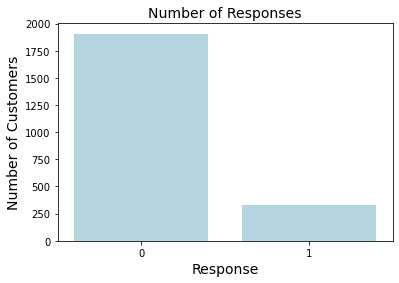

In [16]:
sns.countplot(x='Response', data = mkt, color = "lightblue")
plt.title('Number of Responses', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Response', fontsize = 14)
plt.show()

In [17]:
pd.crosstab(mkt.AcceptedCmp1, mkt.Response, normalize='columns')

Response,0,1
AcceptedCmp1,,
0,0.965897,0.763473
1,0.034103,0.236527


In [18]:
mkt['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

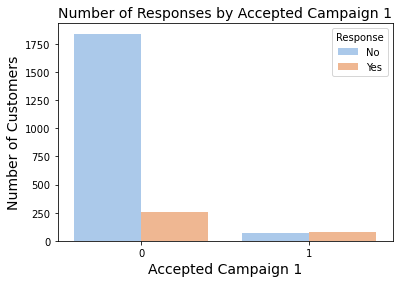

In [19]:
sns.countplot(x='AcceptedCmp1', data = mkt, palette='pastel', hue = 'Response')
plt.title('Number of Responses by Accepted Campaign 1', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Accepted Campaign 1', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [20]:
pd.crosstab(mkt.AcceptedCmp2, mkt.Response, normalize='columns')

Response,0,1
AcceptedCmp2,,
0,0.994753,0.94012
1,0.005247,0.05988


In [21]:
mkt['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

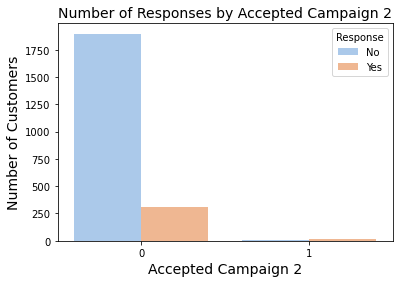

In [22]:
sns.countplot(x='AcceptedCmp2', data = mkt, palette='pastel', hue = 'Response')
plt.title('Number of Responses by Accepted Campaign 2', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Accepted Campaign 2', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [23]:
pd.crosstab(mkt.AcceptedCmp3, mkt.Response, normalize='columns')

Response,0,1
AcceptedCmp3,,
0,0.954879,0.769461
1,0.045121,0.230539


In [24]:
mkt['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

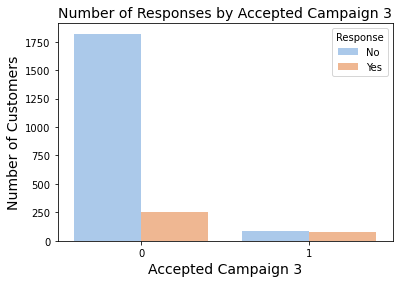

In [25]:
sns.countplot(x='AcceptedCmp3', data = mkt, palette='pastel', hue = 'Response')
plt.title('Number of Responses by Accepted Campaign 3', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Accepted Campaign 3', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [26]:
pd.crosstab(mkt.AcceptedCmp4, mkt.Response, normalize='columns')

Response,0,1
AcceptedCmp4,,
0,0.944911,0.814371
1,0.055089,0.185629


In [27]:
mkt['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

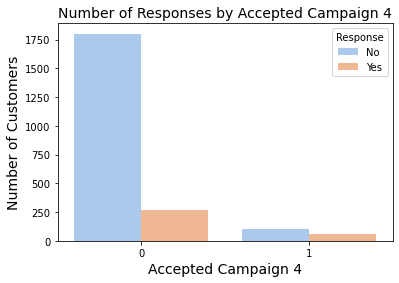

In [28]:
sns.countplot(x='AcceptedCmp4', data = mkt, palette='pastel', hue = 'Response')
plt.title('Number of Responses by Accepted Campaign 4', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Accepted Campaign 4', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [29]:
pd.crosstab(mkt.AcceptedCmp5, mkt.Response, normalize='columns')

Response,0,1
AcceptedCmp5,,
0,0.962749,0.724551
1,0.037251,0.275449


In [30]:
mkt['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

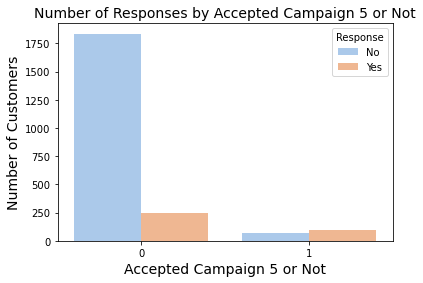

In [31]:
sns.countplot(x='AcceptedCmp5', data = mkt, palette='pastel', hue = 'Response')
plt.title('Number of Responses by Accepted Campaign 5 or Not', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Accepted Campaign 5 or Not', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [32]:
mkt['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [33]:
mkt['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [34]:
pd.crosstab(mkt.Education, mkt.Response, normalize='columns')

Response,0,1
Education,,
2n Cycle,0.094963,0.065868
Basic,0.027282,0.005988
Graduation,0.511542,0.455090
Master,0.164218,0.170659
PhD,0.201994,0.302395


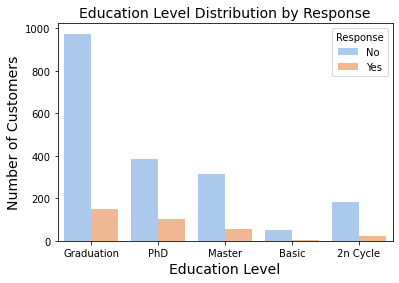

In [35]:
sns.countplot(x='Education', data = mkt, palette='pastel', hue = 'Response')
plt.title('Education Level Distribution by Response', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Education Level', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [36]:
pd.crosstab(mkt.Education, mkt.Response, normalize='columns')

Response,0,1
Education,,
2n Cycle,0.094963,0.065868
Basic,0.027282,0.005988
Graduation,0.511542,0.455090
Master,0.164218,0.170659
PhD,0.201994,0.302395


In [37]:
mkt['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [38]:
mkt['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [39]:
pd.crosstab(mkt.Marital_Status, mkt.Response, normalize='columns')

Response,0,1
Marital_Status,,
Absurd,0.000525,0.002994
Alone,0.001049,0.002994
Divorced,0.096537,0.143713
Married,0.401889,0.293413
Single,0.196222,0.317365
Together,0.272823,0.179641
Widow,0.030430,0.056886
YOLO,0.000525,0.002994


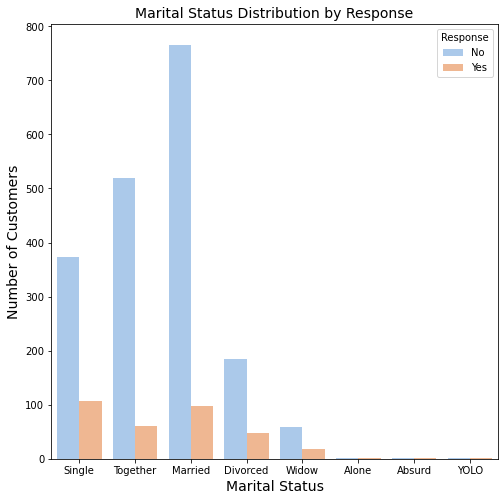

In [40]:
plt.figure(figsize = (8,8))
sns.countplot(x='Marital_Status', data = mkt, palette='pastel', hue = 'Response')
plt.title('Marital Status Distribution by Response', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.xlabel('Marital Status', fontsize = 14)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.show()

In [41]:
pd.crosstab(mkt.Marital_Status, mkt.Response, normalize='columns')

Response,0,1
Marital_Status,,
Absurd,0.000525,0.002994
Alone,0.001049,0.002994
Divorced,0.096537,0.143713
Married,0.401889,0.293413
Single,0.196222,0.317365
Together,0.272823,0.179641
Widow,0.030430,0.056886
YOLO,0.000525,0.002994


In [42]:
mkt['Year_Birth'].value_counts()

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

In [43]:
mkt['Year_Birth'] = 2022-mkt['Year_Birth']

In [44]:
mkt = mkt.rename(columns = {"Year_Birth":"Age"})
mkt.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Days,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,65,Graduation,Single,58138.0,0,0,3556,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,68,Graduation,Single,46344.0,1,1,3006,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,57,Graduation,Together,71613.0,0,0,3205,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,38,Graduation,Together,26646.0,1,0,3032,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,41,PhD,Married,58293.0,1,0,3054,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [45]:
mktd = mkt[['Age', 'Days', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']] 
round(mktd.describe(), 2)

,Age,Days,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,53.19,3246.58,52237.98,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,2.66,5.79,5.32
std,11.98,202.12,25037.96,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.92,3.25,2.43
min,26.00,2893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,45.00,3073.75,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,0.00,3.00,3.00
50%,52.00,3248.50,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,2.00,5.00,6.00
75%,63.00,3422.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,4.00,8.00,7.00
max,129.00,3592.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,28.00,13.00,20.00


Text(0.5, 0, 'Response')

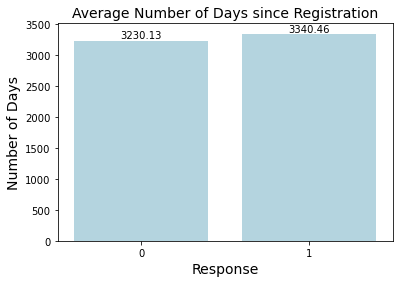

In [46]:
aa=sns.barplot(x="Response", y="Days", data=mkt, ci = None, color = "lightblue")
aa.bar_label(aa.containers[0])
plt.title('Average Number of Days since Registration', fontsize = 14)
plt.ylabel('Number of Days', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

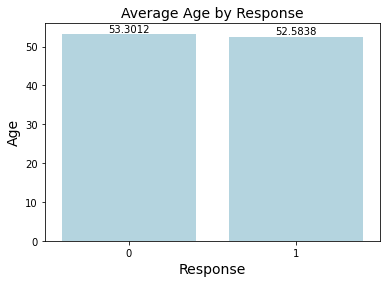

In [47]:
ax=sns.barplot(x="Response", y="Age", data=mkt, ci = None, color = "lightblue")
ax.bar_label(ax.containers[0])
plt.title('Average Age by Response', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

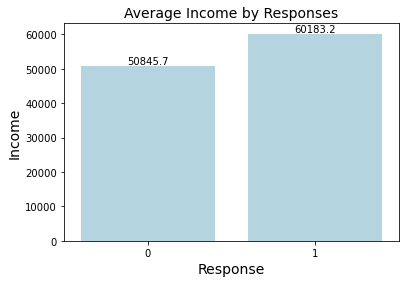

In [48]:
ay=sns.barplot(x="Response", y="Income", data=mkt, ci = None, color = "lightblue")
ay.bar_label(ay.containers[0])
plt.title('Average Income by Responses', fontsize = 14)
plt.ylabel('Income', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

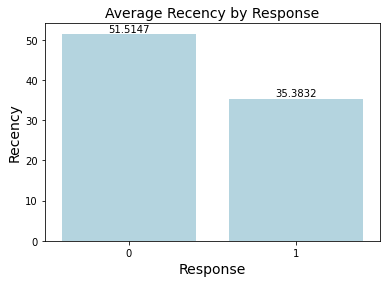

In [49]:
az=sns.barplot(x="Response", y="Recency", data=mkt, ci = None, color = "lightblue")
az.bar_label(az.containers[0])
plt.title('Average Recency by Response', fontsize = 14)
plt.ylabel('Recency', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

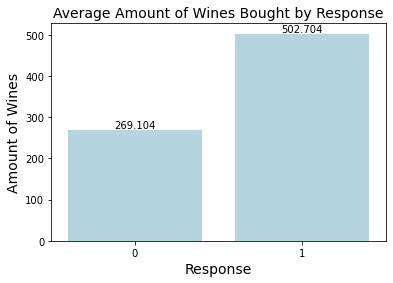

In [50]:
ab=sns.barplot(x="Response", y="MntWines", data=mkt, ci = None, color = "lightblue")
ab.bar_label(ab.containers[0])
plt.title('Average Amount of Wines Bought by Response', fontsize = 14)
plt.ylabel('Amount of Wines', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

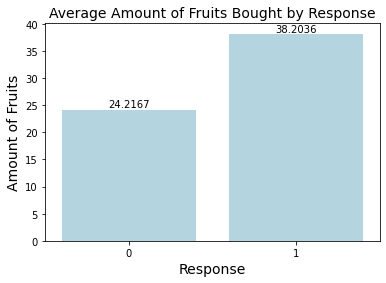

In [51]:
ac=sns.barplot(x="Response", y="MntFruits", data=mkt, ci = None, color = "lightblue")
ac.bar_label(ac.containers[0])
plt.title('Average Amount of Fruits Bought by Response', fontsize = 14)
plt.ylabel('Amount of Fruits', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

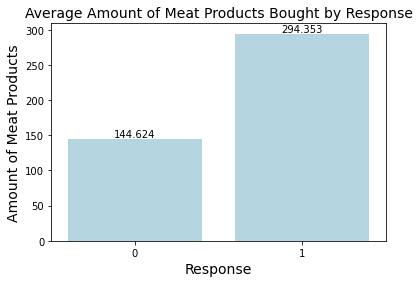

In [52]:
ac=sns.barplot(x="Response", y="MntMeatProducts", data=mkt, ci = None, color = "lightblue")
ac.bar_label(ac.containers[0])
plt.title('Average Amount of Meat Products Bought by Response', fontsize = 14)
plt.ylabel('Amount of Meat Products', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

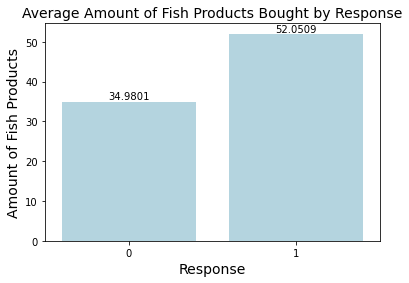

In [53]:
ad=sns.barplot(x="Response", y="MntFishProducts", data=mkt, ci = None, color = "lightblue")
ad.bar_label(ad.containers[0])
plt.title('Average Amount of Fish Products Bought by Response', fontsize = 14)
plt.ylabel('Amount of Fish Products', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

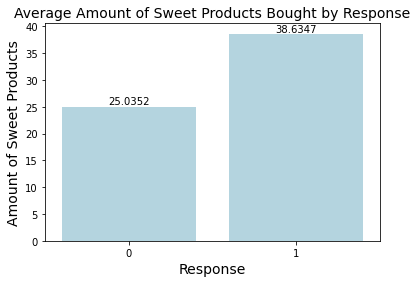

In [54]:
ad=sns.barplot(x="Response", y="MntSweetProducts", data=mkt, ci = None, color = "lightblue")
ad.bar_label(ad.containers[0])
plt.title('Average Amount of Sweet Products Bought by Response', fontsize = 14)
plt.ylabel('Amount of Sweet Products', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

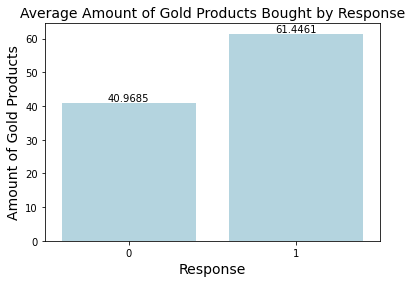

In [55]:
ah=sns.barplot(x="Response", y="MntGoldProds", data=mkt, ci = None, color = "lightblue")
ah.bar_label(ah.containers[0])
plt.title('Average Amount of Gold Products Bought by Response', fontsize = 14)
plt.ylabel('Amount of Gold Products', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

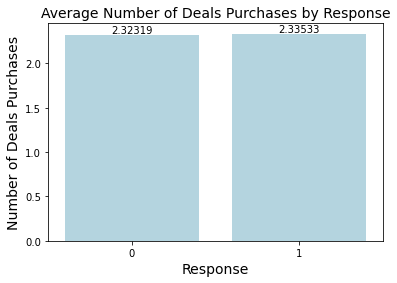

In [56]:
ai=sns.barplot(x="Response", y="NumDealsPurchases", data=mkt, ci = None, color = "lightblue")
ai.bar_label(ai.containers[0])
plt.title('Average Number of Deals Purchases by Response', fontsize = 14)
plt.ylabel('Number of Deals Purchases', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

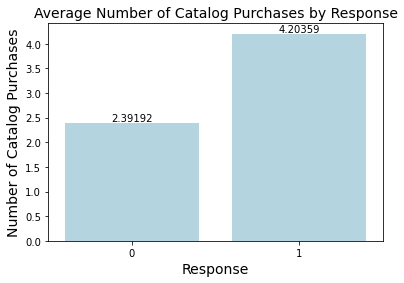

In [57]:
ae=sns.barplot(x="Response", y="NumCatalogPurchases", data=mkt, ci = None, color = "lightblue")
ae.bar_label(ae.containers[0])
plt.title('Average Number of Catalog Purchases by Response', fontsize = 14)
plt.ylabel('Number of Catalog Purchases', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

Text(0.5, 0, 'Response')

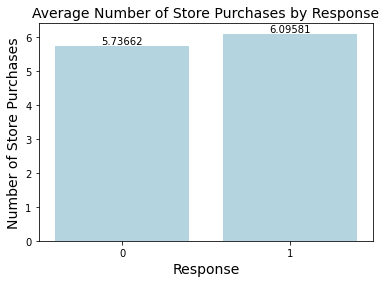

In [58]:
af=sns.barplot(x="Response", y="NumStorePurchases", data=mkt, ci = None, color = "lightblue")
af.bar_label(af.containers[0])
plt.title('Average Number of Store Purchases by Response', fontsize = 14)
plt.ylabel('Number of Store Purchases', fontsize = 14)
plt.xlabel('Response', fontsize = 14)


Text(0.5, 0, 'Response')

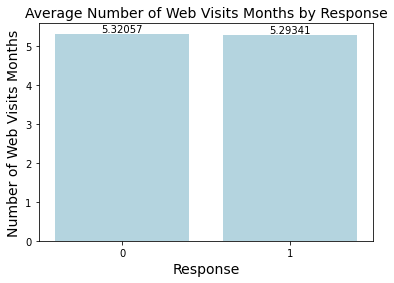

In [59]:
ag=sns.barplot(x="Response", y="NumWebVisitsMonth", data=mkt, ci = None, color = "lightblue")
ag.bar_label(ag.containers[0])
plt.title('Average Number of Web Visits Months by Response', fontsize = 14)
plt.ylabel('Number of Web Visits Months', fontsize = 14)
plt.xlabel('Response', fontsize = 14)

In [60]:
mktd.corr()

,Age,Days,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Age,1.000000,-0.022431,0.160899,-0.230176,0.352111,0.019871,0.157773,0.017917,0.030872,0.041625,0.018133,0.061818,0.060846,0.121275,0.128272,-0.121139
Days,-0.022431,1.000000,-0.018470,-0.053343,0.017465,0.024522,0.166264,0.066928,0.092713,0.080769,0.081268,0.159596,0.218552,0.096198,0.110592,0.272449
Income,0.160899,-0.018470,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,-0.082315,0.586826,0.526600,-0.549785
Kidhome,-0.230176,-0.053343,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.502237,-0.499683,0.447846
Teenhome,0.352111,0.017465,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,-0.110769,0.050695,0.134884
Recency,0.019871,0.024522,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,0.025110,0.000799,-0.021445
MntWines,0.157773,0.166264,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.635226,0.642100,-0.320653
MntFruits,0.017917,0.066928,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.487917,0.461758,-0.418383
MntMeatProducts,0.030872,0.092713,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.723827,0.479659,-0.539470
MntFishProducts,0.041625,0.080769,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.534478,0.459855,-0.446003


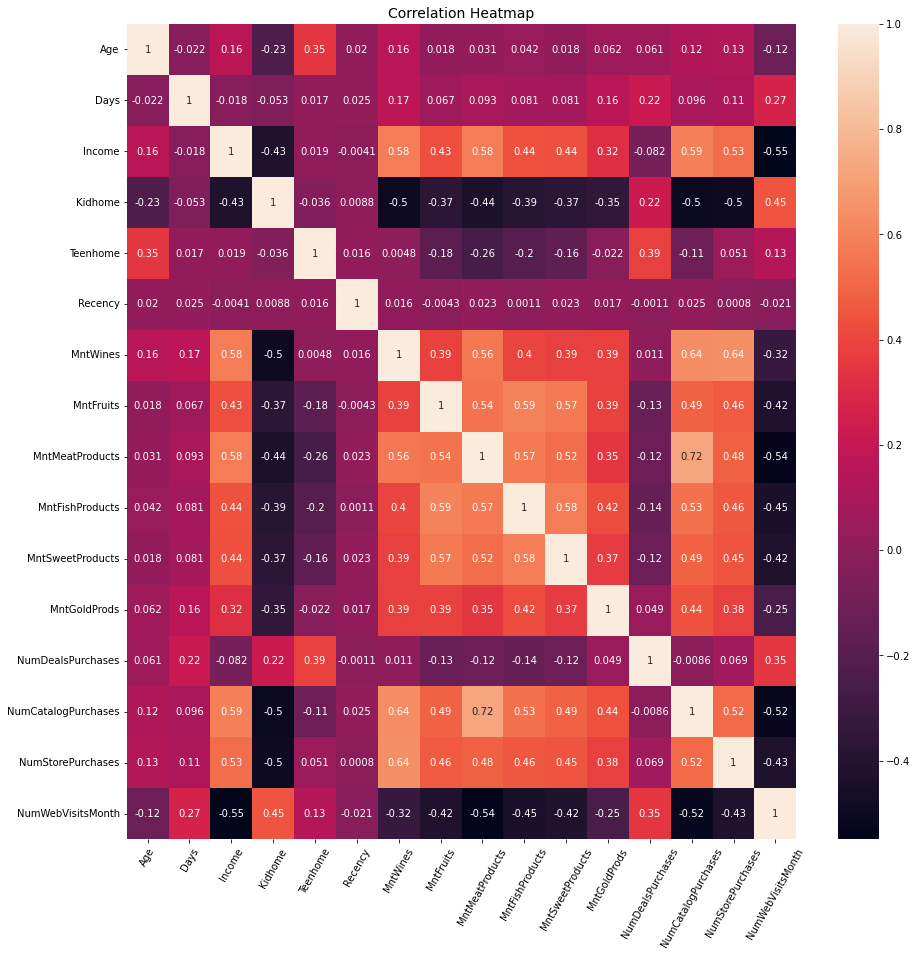

In [61]:
#create correlation matrix
plt.figure(figsize = (15,15))

matrix = mktd.corr()
sns.heatmap(matrix, annot=True)
plt.yticks(rotation = 360)
plt.xticks(rotation = 60)
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

In [62]:
#Define Target Variables and Predictors

y = mkt['Response']
x = mkt.drop('Response', axis = 1)

In [63]:
x=pd.get_dummies(x, columns = ['Education', 'Marital_Status'], dtype='int64')
x = x.drop('Marital_Status_YOLO', axis =1)
x = x.drop('Marital_Status_Absurd', axis =1)
x = x.drop('Marital_Status_Alone', axis =1)


In [64]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2240 non-null   int64  
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Days                     2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   MntWines                 2240 non-null   int64  
 7   MntFruits                2240 non-null   int64  
 8   MntMeatProducts          2240 non-null   int64  
 9   MntFishProducts          2240 non-null   int64  
 10  MntSweetProducts         2240 non-null   int64  
 11  MntGoldProds             2240 non-null   int64  
 12  NumDealsPurchases        2240 non-null   int64  
 13  NumWebPurchases          2240 non-null   int64  
 14  NumCatalogPurchases     

In [65]:
#split data
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=999)

In [66]:
train_x.head()

,Age,Income,Kidhome,Teenhome,Days,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
621,51,31632.0,0,0,3243,92,17,8,12,11,...,0,0,1,0,0,0,0,1,0,0
1795,62,28520.0,1,1,3273,55,11,0,10,0,...,0,0,0,1,0,0,1,0,0,0
672,52,66731.0,0,1,3548,33,371,159,194,58,...,0,0,1,0,0,0,0,0,0,1
1877,64,72905.0,0,0,3052,52,407,114,445,181,...,0,0,1,0,0,0,1,0,0,0
69,52,74854.0,1,2,3340,90,856,59,487,58,...,0,0,1,0,0,0,0,0,1,0


In [67]:
# Over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
train_x, train_y = ros.fit_resample(train_x, train_y)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
train_y.value_counts()

In [ ]:
train_x_scaled = (train_x-train_x.min())/(train_x.max()-train_x.min())
test_x_scaled = (test_x-test_x.min())/(test_x.max()-test_x.min())


In [ ]:
train_x_scaled.columns

In [ ]:
train_x_scaled.head()

# Logistic Regression

In [ ]:
#Logistic Regression

import statsmodels.api as sm
logit=sm.Logit(train_y, train_x_scaled)
result=logit.fit()
print(result.summary2())

In [ ]:
train_xn = train_x_scaled.copy()
train_xn.drop(columns= ['Age', 'Kidhome', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'Complain', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widow'], axis=1, inplace=True)

In [ ]:
#calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = train_xn.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_xn.values, i)
                          for i in range(len(train_xn.columns))]
  
print(vif_data)

In [ ]:
train_xn.head()

In [ ]:
train_xn.drop(columns= ['Income'], axis=1, inplace=True)

In [ ]:
train_xn.head()

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = train_xn.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_xn.values, i)
                          for i in range(len(train_xn.columns))]
  
print(vif_data)

In [ ]:
train_xn.drop(columns= ['NumWebPurchases'], axis=1, inplace=True)

In [ ]:
#calculate Variance Inflation Factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = train_xn.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_xn.values, i)
                          for i in range(len(train_xn.columns))]
  
print(vif_data)

In [ ]:
train_xn.drop(columns= ['NumCatalogPurchases'], axis=1, inplace=True)

In [ ]:
#calculate Variance Inflation Factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = train_xn.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_xn.values, i)
                          for i in range(len(train_xn.columns))]
  
print(vif_data)

In [ ]:
train_xn.drop(columns= ['NumStorePurchases'], axis=1, inplace=True)

In [ ]:
#calculate Variance Inflation Factor
vif_data = pd.DataFrame()
vif_data["feature"] = train_xn.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_xn.values, i)
                          for i in range(len(train_xn.columns))]
  
print(vif_data)

In [ ]:
logit2=sm.Logit(train_y, train_xn)
result2=logit2.fit()
print(result2.summary2())

In [ ]:
train_xn.drop(columns= ['MntFruits'], axis=1, inplace=True)

In [ ]:
logit3=sm.Logit(train_y, train_xn)
result3=logit3.fit()
print(result3.summary2())

In [ ]:
#odd Ratio
model_odds = pd.DataFrame(np.exp(result3.params), columns= ['Odd Ratio'])
model_odds['z-value']= result3.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(result3.conf_int())
model_odds

From the above odd ratio table, we could find that the length the customers stay with the company (Days), amount of meat products, number of deals purchases, the five campaigns have positive influence on customers’ magazine subscription. While number of teenagers (Teenhome), Recency, Amount of Wines, Education level of second cycle, education level of basic and marital status of together have negative correlation with magazine subscription. The top 3 positive variables are Length of customers stay with the company (days), Number of Deals purchases and Campaign 3. Therefore, in order to increase the subscription, the company should target more on the loyal customers who registered for a long time and customer who purchased more with deals. Also the marketing team should do more campaigns 3 to increase the subscription rate. The top 3 negative predictors are Recency, Teenhome and Education level of basic. Therefore, the company should do retargeting campaigns to reactivate those customers who have long time no engagements with company, and sales team should do more efforts converting those active customers. Customers with many teenagers and whose education level is basic are not the target audience for conversion.

In [ ]:
#Model Accuracy
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train_xn, train_y)


test_xn= test_x_scaled[['Teenhome', 'Days', 'Recency', 'MntWines', 'MntMeatProducts', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp5','AcceptedCmp3', 'AcceptedCmp4','Education_2n Cycle', 'Education_Basic', 'Marital_Status_Together']]
y_pred = logreg.predict(test_xn)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_xn, test_y)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

In [ ]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator=logreg, X= test_xn, y_true = test_y)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

In [ ]:
y_predt = logreg.predict(train_xn)
print(classification_report(train_y, y_predt))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(test_y, logreg.predict(test_xn))
fpr, tpr, thresholds = roc_curve(test_y, logreg.predict_proba(test_xn)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The red line mean the true positive rate is equal to the false positive rate. The area above the red line are the points with higher true positive rate than false positive rate, therefore the further the blue line to the red line, the better the model. From this plot, we could see that the AUC of this model is 75% which is similar the accuracy score calculated previously.

In [ ]:
roc_auc_score(test_y, logreg.predict(test_xn))

In [ ]:
logreg.score(test_xn, test_y)

# Support Vector Machines

In [ ]:
train_x_scaled.head()

In [ ]:
#Build a Preliminary Support Vector Machine

from sklearn.svm import SVC

svm = SVC(random_state = 1,kernel = 'rbf')
svm.fit(train_x_scaled, train_y)

In [ ]:
plot_confusion_matrix(svm, test_x_scaled, test_y, values_format = 'd', display_labels=['Did not response', 'Responsed'])

In [ ]:
y_svmpred = svm.predict(test_x_scaled)
print(classification_report(test_y, y_svmpred))

In [ ]:
#Optimize Parameters with Cross Validation
from sklearn.model_selection import GridSearchCV

param_grid =[
    {'C': [0.01, 0.1, 0.5, 1, 10, 100], #C must be >0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
     'kernel': ['rbf']}
]

optimal_parameter = GridSearchCV(
    SVC(),
    param_grid,
    cv =5,
    scoring = 'accuracy',
    verbose =0)

optimal_parameter.fit(train_x_scaled, train_y)
print(optimal_parameter.best_params_)

In [ ]:
#Optimize Parameters with Cross Validation

param_grid =[
    {'C': [0.01, 0.1, 0.5, 1, 10, 100], #C must be >0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
     'kernel': ['rbf']}
]

optimal_parameter = GridSearchCV(
    SVC(),
    param_grid,
    cv =5,
    scoring = 'f1_macro',
    verbose =0)

optimal_parameter.fit(train_x_scaled, train_y)
print(optimal_parameter.best_params_)

In [ ]:
#Optimize Parameters with Cross Validation

param_grid =[
    {'C': [0.01, 0.1, 0.5, 1, 10, 100], #C must be >0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
     'kernel': ['rbf']}
]

optimal_parameter = GridSearchCV(
    SVC(),
    param_grid,
    cv =5,
    scoring = 'roc_auc',
    verbose =0)

optimal_parameter.fit(train_x_scaled, train_y)
print(optimal_parameter.best_params_)

In [ ]:
#Tuning SVM model

svm2 = SVC(random_state=11, C=10, gamma = 1, kernel = 'rbf')
svm2.fit(train_x_scaled, train_y)

In [ ]:
test_x_scaled.shape

In [ ]:
plot_confusion_matrix(svm2, test_x_scaled, test_y, values_format = 'd', display_labels=['Did not response', 'Responsed'])

In [ ]:
y_svmpred2 = svm2.predict(test_x_scaled)
print(classification_report(test_y, y_svmpred2))

In [ ]:
y_svmpredt2 = svm2.predict(train_x_scaled)
print(classification_report(train_y, y_svmpredt2))

In [ ]:
# Model Precision
print("Precision:", metrics.precision_score(test_y, y_svmpred2))
print('\n')

# Model Recall
print("Recall:", metrics.recall_score(test_y, y_svmpred2))
print('\n')

In [ ]:
# Model Precision
print("Precision:", metrics.precision_score(test_y, y_svmpred))
print('\n')

# Model Recall
print("Recall:", metrics.recall_score(test_y, y_svmpred))
print('\n')

In [ ]:
from sklearn.inspection import permutation_importance

%matplotlib inline

perm_importance = permutation_importance(svm, test_x_scaled, test_y)

feature_names = test_x_scaled.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (15,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
from sklearn.inspection import permutation_importance

%matplotlib inline

perm_importance = permutation_importance(svm2, test_x_scaled, test_y)

feature_names = test_x_scaled.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize = (15,15))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

I plot the feature permutation importance as above. The top of the features are with the highest importance. The negative values represent that those variables need to have more noisy data to make model have higher accuracy, while these features are not important to the target variable

From the graph, we could see that in the SVM model, the top 3 most important predictors are Recency, Campaign 3 and length of the customers stay with the company (Days). The top 3 variables which do not have much influence on magazine subscription are Education level of Master, Education level of Graduation and Number of Web Visits Month. The importance does not show the correlations, but the top 3 most important predictors are the same as the logistic regression model. Therefore, I still recommend the company to do more retargeting campaigns to reactive those customers who have long recency, and do more campaign 3 to increase magazine subscriptions. Moreover, the company should provide more investment in the customers who stay longer with them. Those the loyal customers and are relatively easy to be convert.